In [1]:
"""============================================================================
   Hàm tính p-value từ giá trị t-statistics:
      * t_stat: giá trị t-statistics
      * df    : bậc tự do
============================================================================"""
def t2p(t_stat, df):
   import scipy.stats as stats
   p_value = (1 - stats.t.cdf(abs(t_stat), df)) * 2
   return p_value
#------------------------------------------------------------------------------
   
t_stat  = [2.613, 2.611]
df      = 39
 
for t in t_stat:
   p_value = t2p(t, df)
   print('   * t_stat = %.5f' %t, '--> p-value = %.5f' %p_value)


   * t_stat = 2.61300 --> p-value = 0.01268
   * t_stat = 2.61100 --> p-value = 0.01275


In [4]:
"""=============================================================================
   Phương pháp One way ANOVA: 
       - Tính toán theo các công thức SSW và SSB
       - Dùng các hàm của scipy.stats
============================================================================="""
import numpy       as np
import pandas      as pd
import scipy.stats as stats

alpha = 0.05

##------------------------------------------------------------------------------
## Chuẩn bị dữ liệu
##------------------------------------------------------------------------------
## Kích thước của các mẫu có thể KHÁC NHAU
# LDS3folder = 'D:/NAT/RnD/Edu/01.CD - DH/T3H.LDS3.Maths and Stats for Data Science'
# folder     = LDS3folder + '/Materials/Datasets/One way ANOVA/'

fname      = 'Excavation Depth and Archaeology.txt'
# d          = pd.read_csv(folder + fname, sep = '\t')

d          = pd.read_csv(fname, sep = '\t')

## Xác định k nhóm là k cột trong tập dữ liệu
# groupsA = list(d.columns.values) # array
k      = len(d.columns)
groups = list(d.columns) # (k column headers)

## Tạo k mẫu (loại bỏ giá trị NaN trong các mẫu)
samples = []
for j in range(k):
    sample = [x for x in d[groups[j]] if pd.notnull(x)]
    samples.append(sample)

##------------------------------------------------------------------------------
print('----------- Cách 1: Tính toán "truyền thống" theo các công thức ---------')
##------------------------------------------------------------------------------    
## Số phần tử của mỗi nhóm
sizes = np.zeros(k)
for j in range(k): 
    sizes[j] = np.size(samples[j])

## Giá trị trung bình của mỗi mẫu
means = np.zeros(k)
for j in range(k):
    means[j] = np.mean(samples[j])

## Giá trị trung bình của tất cả các mẫu
meanT = np.mean(means)

## Các đại lượng BETWEEN groups: SSB, dfB
SSB = 0
for j in range(k):
    SSB += sizes[j] * np.power((means[j] - meanT), 2)
dfB = (k - 1)
print('SSB           : %.4f' %SSB)
print('dfB           : %d' %dfB)
   
## Các đại lượng WITHIN groups: SSW, dfW
SSW = 0
for j in range(k):
    SSWj = 0
    for i in range(int(sizes[j])):
        SSWj += np.power(samples[j][i] - means[j], 2)
    SSW += SSWj
dfW = int(np.sum(sizes) - k)
print('SSW           : %.4f' %SSW)
print('dfW           : %d' %dfW)

## Trị thống kê: F statistics
F = (SSB / dfB) / (SSW / dfW)
print('F statistic   : %.4f' %F)

## Giá trị tới hạn
##------------------------------------------------------------------------------
## Hàm scipy.stats.f.ppf(q, dfn, dfd) xác định giá trị tới hạn
##    q  : confidence level     (1 - alpha)
##    dfn: tử số (numerator)    dfB (BETWEEN groups)
##    dfd: mẫu số (denominator) dfW (WITHIN groups)
##
## Hàm scipy.stats.f.cdf(crit, dfn, dfd) xác định confidence level (1 - alpha)
##------------------------------------------------------------------------------
critical_value = stats.f.ppf(q = 1 - alpha, dfn = dfB, dfd = dfW)
print('Critical value: %.4f' %critical_value)
conf_level     = stats.f.cdf(critical_value, dfn = dfB, dfd = dfW)

if (F < critical_value):
    print('(F <  critical value) ==> ACCEPT the H0 that the means are equal.')
else:
    print('(F >= critical value) ==> REJECT the H0 that the means are equal.')

##------------------------------------------------------------------------------
print('\n--------------------- Cách 2: Sử dụng hàm của Python ------------------')
##------------------------------------------------------------------------------    
fvalue, pvalue = stats.f_oneway(samples[0], samples[1], samples[2], samples[3])

print('p-value       : %.4f' %pvalue)
print('F statistic   : %.4f' %fvalue)



----------- Cách 1: Tính toán "truyền thống" theo các công thức ---------
SSB           : 12486.4848
dfB           : 3
SSW           : 11464.5722
dfW           : 42
F statistic   : 15.2479
Critical value: 2.8270
(F >= critical value) ==> REJECT the H0 that the means are equal.

--------------------- Cách 2: Sử dụng hàm của Python ------------------
p-value       : 0.0000
F statistic   : 15.1391


   S_cars  M_cars  X_cars
0     643     469     484


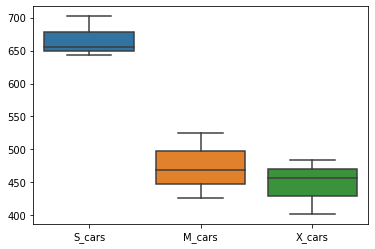

-------------------------------------------------
* Kiểm định LEVENE:                              
    H0: VAR(S_cars) = VAR(M_cars) = VAR(X_cars)  
    Ha: Các phương sai KHÔNG BẰNG NHAU           
-------------------------------------------------
* Levene-statistic = 0.1767, p-value = 0.8422
--------------------------------------------------
* Kiểm định SHAPIRO                               
    H0: S_cars, M_cars, X_cars ~ Norm(Muy, Sigma) 
    Ha: S_cars, M_cars, X_cars KHÔNG pp chuẩn     
--------------------------------------------------
* Shapiro-statistic = 0.9348, p-value = 0.5284

* Hàm f_oneway() chỉ trả về F-statistic và p-value; KHÔNG tạo ANOVA table
   F-statistic = 25.1754, p-value = 0.0012

* Hàm anova_lm() tạo ANOVA table
                sum_sq   df          F    PR(>F)
C(cars)   86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     

In [5]:
"""=============================================================================
   Sở GTCC muốn kiểm tra sự an toàn của các xe nhỏ, hạng trung và cỡ lớn. 
    1. Tạo dataframe như hình vẽ.
    2. Vẽ boxplot, quan sát kết quả.
    3. Áp dụng ANOVA để xem có sự khác biệt đáng kể giữa 3 loại xe (alpha = 5%).
============================================================================="""
import matplotlib.pyplot as plt
import pandas            as pd
import scipy.stats       as stats
import seaborn           as sns
import statsmodels.api   as sm

from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

alpha      = .05
confidence = (1 - alpha)

# 1. Tạo dataframe 
df = pd.DataFrame({'S_cars': [643, 655, 702],
                   'M_cars': [469, 427, 525],
                   'X_cars': [484, 456, 402]})
print(df.loc[[0]])

# 2. Vẽ boxplot, quan sát kết quả.
sns.boxplot(data=df)
plt.autoscale(enable=True)
plt.show()

# 3. Áp dụng ANOVA
# 3a) Chuẩn bị dữ liệu theo statsmodels
df_melt = pd.melt(df.reset_index(), id_vars = ['index'], 
                  value_vars = ['S_cars', 'M_cars', 'X_cars'])

# Đổi tên các cột
df_melt.columns = ['index', 'cars', 'value']

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(cars)', data = df_melt).fit()

# 3b) Kiểm định Levene: S_cars, M_cars, X_cars có cùng phương sai
print('-------------------------------------------------')
print('* Kiểm định LEVENE:                              ')
print('    H0: VAR(S_cars) = VAR(M_cars) = VAR(X_cars)  ')
print('    Ha: Các phương sai KHÔNG BẰNG NHAU           ')
print('-------------------------------------------------')
levene, pvalue = stats.levene(df.S_cars, df.M_cars, df.X_cars)
print('* Levene-statistic = %.4f, p-value = %.4f' % (levene, pvalue))
# p-value > alpha => không bác bỏ H0: VAR(S_cars) = VAR(M_cars) = VAR(X_cars)

# 3c) Kiểm định Shapiro: S_cars, M_cars, X_cars có pp chuẩn
print('--------------------------------------------------')
print('* Kiểm định SHAPIRO                               ')
print('    H0: S_cars, M_cars, X_cars ~ Norm(Muy, Sigma) ')
print('    Ha: S_cars, M_cars, X_cars KHÔNG pp chuẩn     ')
print('--------------------------------------------------')
shapiro, pvalue = stats.shapiro(model.resid)
print('* Shapiro-statistic = %.4f, p-value = %.4f' % (shapiro, pvalue))
# p-value > alpha => không bác bỏ H0: dữ liệu được rút ra từ phân phối chuẩn.

# 3d) One-way ANOVA
print('\n* Hàm f_oneway() chỉ trả về F-statistic và p-value; KHÔNG tạo ANOVA table')
fvalue, pvalue = stats.f_oneway(df.S_cars, df.M_cars, df.X_cars)
print('   F-statistic = %.4f, p-value = %.4f' %(fvalue, pvalue))
# Giá trị P-value có ý nghĩa về mặt thống kê (P < 0.05),
# do đó, có thể kết luận rằng có sự khác biệt đáng kể giữa các loại xe.

print('\n* Hàm anova_lm() tạo ANOVA table')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table, '\n')

# 3e) Kiểm định Tukey HSD
m_comp = pairwise_tukeyhsd(endog = df_melt['value'], groups = df_melt['cars'], alpha = 0.05)
print(m_comp)
# ngoại trừ X_cars và M_cars, tất cả các so sánh cặp khác đều bác bỏ H0
# và chỉ ra sự khác biệt đáng kể về mặt thống kê.




    type  cold  warm  hot
0  super     4     7   10
1  super     5     9   12
2  super     6     8   11
3  super     5    12    9
4   best     6    13   12
5   best     6    15   13
6   best     4    12   10
7   best     4    12   13


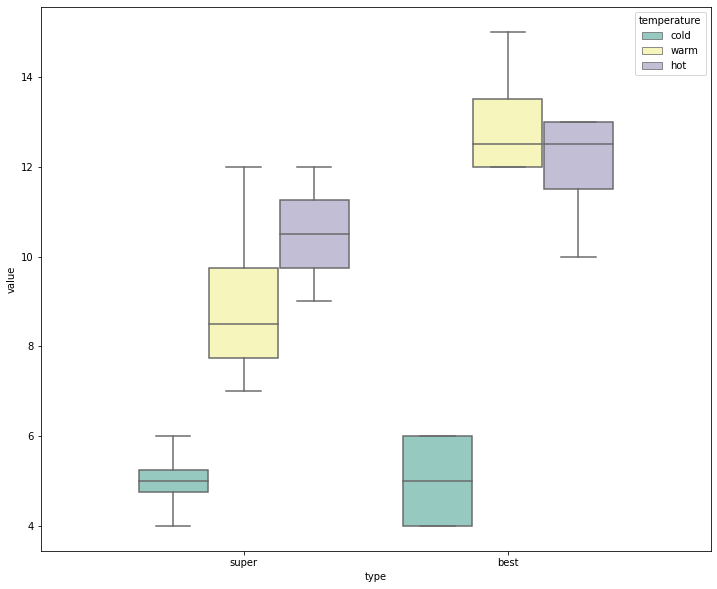

-------------------------------------------------
* Kiểm định LEVENE:                              
    H0: Các mẫu dữ liệu có phương sai BẰNG NHAU  
    Ha: Các phương sai KHÔNG BẰNG NHAU           
-------------------------------------------------
* Levene-statistic = 2.0152, p-value = 0.1583

* Hàm anova_lm() tạo ANOVA table
                            sum_sq    df          F        PR(>F)
C(type)                  20.166667   1.0   9.810811  5.758440e-03
C(temperature)          200.333333   2.0  48.729730  5.439849e-08
C(type):C(temperature)   16.333333   2.0   3.972973  3.722434e-02
Residual                 37.000000  18.0        NaN           NaN 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  best  super  -1.8333 0.1996 -4.7083 1.0416  False
---------------------------------------------------
type: best Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 

In [1]:
'''=============================================================================
   1. Cho tập tin data.xlsx. Đọc dữ liệu
   2. Dữ liệu có 2 factors: Detergent (super, best), Temperature (hot, warm, cold).
   3. Sử dụng ANOVA hai chiều, đánh giá chất tẩy rửa và nhiệt độ ảnh hưởng 
      như thế nào đối với chất bẩn bị loại bỏ.
      a) Ảnh hưởng của chất tẩy rửa đến lượng chất bẩn bị loại bỏ 
      b) Ảnh hưởng của nhiệt độ đến lượng chất bẩn bị loại bỏ 
      c) Ảnh hưởng của chất tẩy rửa và nhiệt độ đến lượng chất bẩn bị loại bỏ
      H0D: Lượng chất bẩn bị loại bỏ không phụ thuộc vào loại chất tẩy rửa.
      H0T: Lượng chất bẩn bị loại bỏ không phụ thuộc vào nhiệt độ.
============================================================================='''
import pandas            as pd
import matplotlib.pyplot as plt
import scipy.stats       as stats
import seaborn           as sns
import statsmodels.api   as sm
# import csv
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Đọc tập tin dữ liệu.
# folder = 'Data/Bai 7/'
# data   = pd.read_excel(folder + 'data.xlsx')
data   = pd.read_excel('data.xlsx')
# data =pd.read_excel('data.xls')

print(data)

# Chuẩn bị dữ liệu theo statsmodels
d_melt = pd.melt(data, id_vars=['type'], value_vars=['cold', 'warm', 'hot'])

# Đổi tên các cột
d_melt.columns = ['type', 'temperature', 'value']
d_melt.head()

# Ordinary Least Squares (OLS) model
model  = ols('value ~ C(type) + C(temperature) + C(type):C(temperature)', data=d_melt).fit()

# 2. Vẽ boxplot, quan sát kết quả.
plt.figure(figsize = (12,10))
sns.boxplot(x='type', y='value', hue='temperature', data=d_melt, palette='Set3')
plt.autoscale(enable=True)
plt.show()

# 3. Áp dụng ANOVA.
# 3a) Kiểm định Levene: Các mẫu dữ liệu có cùng phương sai
print('-------------------------------------------------')
print('* Kiểm định LEVENE:                              ')
print('    H0: Các mẫu dữ liệu có phương sai BẰNG NHAU  ')
print('    Ha: Các phương sai KHÔNG BẰNG NHAU           ')
print('-------------------------------------------------')
levene, pvalue = stats.levene(data['hot'], data['warm'], data['cold'])
print('* Levene-statistic = %.4f, p-value = %.4f' % (levene, pvalue))
# p-value > alpha => không bác bỏ H0: Các mẫu dữ liệu có phương sai bằng nhau

# 3b) Two-way ANOVA
print('\n* Hàm anova_lm() tạo ANOVA table')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table, '\n')

# Sự khác biệt về chất tẩy rửa và nhiệt độ có ý nghĩa thống kê,
# nhưng ANOVA không cho biết chất tẩy rửa và nhiệt độ khác nhau đáng kể với nhau. 
# Để biết các cặp chất tẩy rửa và nhiệt độ khác nhau đáng kể, 
# thực hiện nhiều phân tích so sánh cặp bằng cách sử dụng Tukey HSD test.

# 3c) Kiểm định Tukey HSD
m_comp = pairwise_tukeyhsd(endog = d_melt['value'], groups = d_melt['type'], alpha=0.05)
print(m_comp)

for name, grouped_df in d_melt.groupby('type'):
    print('type: {}'.format(name), pairwise_tukeyhsd(grouped_df['value'], 
                                                     grouped_df['temperature'], 
                                                     alpha=0.05))
for name, grouped_df in d_melt.groupby('temperature'):
   print('temperature: {}'.format(name), pairwise_tukeyhsd(grouped_df['value'], grouped_df['type'], alpha = 0.05))
    


In [23]:
pip install xlrd==1.2.0


Note: you may need to restart the kernel to use updated packages.


'c:\program' is not recognized as an internal or external command,
operable program or batch file.
